## In this notebook features that have been analysed are as follows
* feature_1
* feature_2
* feature_3
* target variable
* first active month

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## 1. Some Basic information on train data

In [3]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(201917, 6)

In [4]:
train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [5]:
# Checking number of null values
train_df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

## 2. Gives info about the month in which the card was used for the first time

In [7]:
train_df['first_active_month']

0         2017-06
1         2017-01
2         2016-08
3         2017-09
4         2017-11
           ...   
201912    2017-09
201913    2015-10
201914    2017-08
201915    2016-07
201916    2017-07
Name: first_active_month, Length: 201917, dtype: object

<h2> Objective : To observe trend in number of card users with each month</h2>

Text(0, 0.5, 'Number of users')

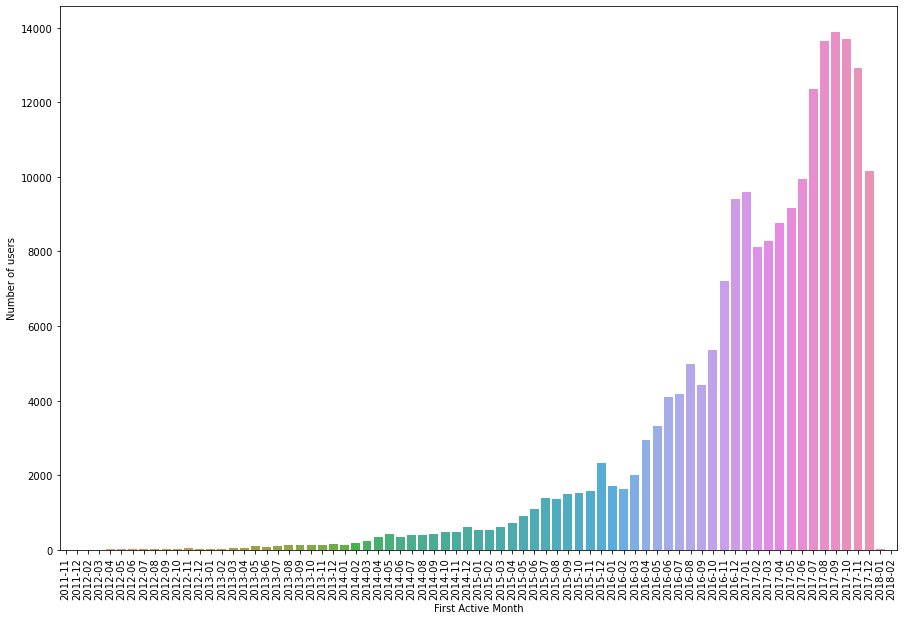

In [9]:
card_users = train_df.groupby(['first_active_month'])['card_id'].count().sort_index()
index = card_users.index
values = card_users.values

fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(index,values,ax = ax)
plt.xticks(rotation=90)
plt.xlabel('First Active Month')
plt.ylabel('Number of users')

### Analysis
* Number of users has increased every month and it shows some sort of exponential growth with no new users recorded for 2018-01 and 2018-02.
* Let's look if we have any repeating card_id's and number of unique card Id's.


In [6]:
print("Percentage of unique card Id's : ",(train_df['card_id'].nunique() * 100)/train_df.shape[0])

Percentage of unique card Id's :  100.0


In [7]:
print("Number of card_id's : ",train_df['card_id'].nunique())

Number of card_id's :  201917


All cards are unique

## 3. Objective : To look at the distribution of target variable

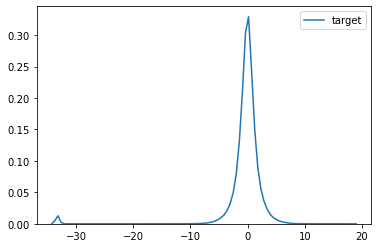

In [7]:
sns.kdeplot(train_df['target'])

## Analysis
* While most of the target distribution is normal and centered around 0, only few of the target values are outliers with values lying beyond -30.
* Let's look at the number of target values which lie in the outlier range.

## Conclusion
* Metric to be used for the problem is RMSE (Root Mean squared error)
* It is going to be affected by outliers.
* We need to carefully identify data points which can possibly give us such outlier target score.
* Probably we'll build a classifier to identify such outlier points.

In [20]:
len(train_df[(train_df['target'] <= -10) | (train_df['target'] >= 10)])*100/len(train_df)

2.877915182971221

Nearly 3% of the values lie beyond the normal distribution range.

In [22]:
## Obtaining quantiles for target variable
qq = np.percentile(train_df['target'],q=[25,50,75,90,95,99])
print(qq)

[-0.88311023 -0.02343689  0.76545303  1.83028022  2.70268023  4.812662  ]


In [25]:
## In order to obtain a zoomed view of how the distribution looks like with outliers or extreme values
## I am creating another dataframe by taking 25%ile and 95%ile values as boundary
nout_train_df = train_df[(train_df['target'] >= -2) & (train_df['target'] <= 2)]

## 4. Objective : To look at the distribution of feature_1,feature_2,feature_3

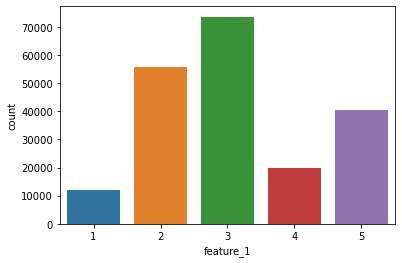

In [9]:
sns.countplot(train_df['feature_1'])

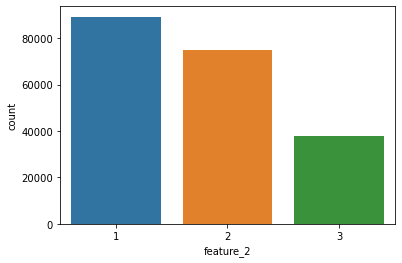

In [17]:
sns.countplot(train_df['feature_2'])

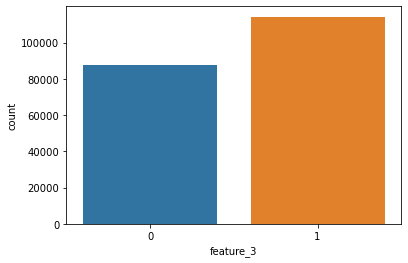

In [18]:
sns.countplot(train_df['feature_3'])

## Analysis
* Category 3 has the highest number of feature_1 count.
* While distribution is different for different categories in feature_1.
* It is almost equal for remaining two features with slight variation in feature_2.

## 4.1 Objective : Visualize relation between categorical features(feature_1,feature_2,feature_3) and target variable

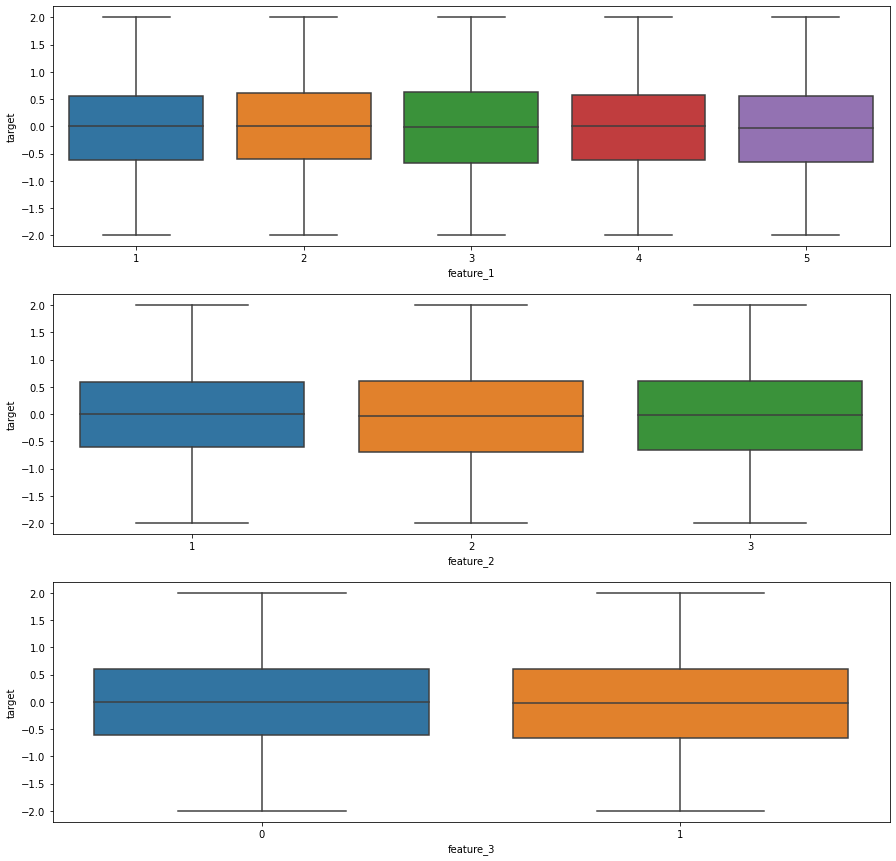

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3,ncols = 1,figsize=(15,15))

sns.boxplot(x='feature_1',y='target',data=nout_train_df,ax = ax1)
sns.boxplot(x='feature_2',y='target',data=nout_train_df,ax = ax2)
sns.boxplot(x='feature_3',y='target',data=nout_train_df,ax = ax3)

## Analysis
* Different categories of feature 1,feature_2 and feature_3 don't show difference in distribution of target variables.

## Conclusion
* By the looks of it, this categorical features don't seem to correlate much with target variable.

## 4.2 Objective : To check feature interaction between feature_1 and feature_2

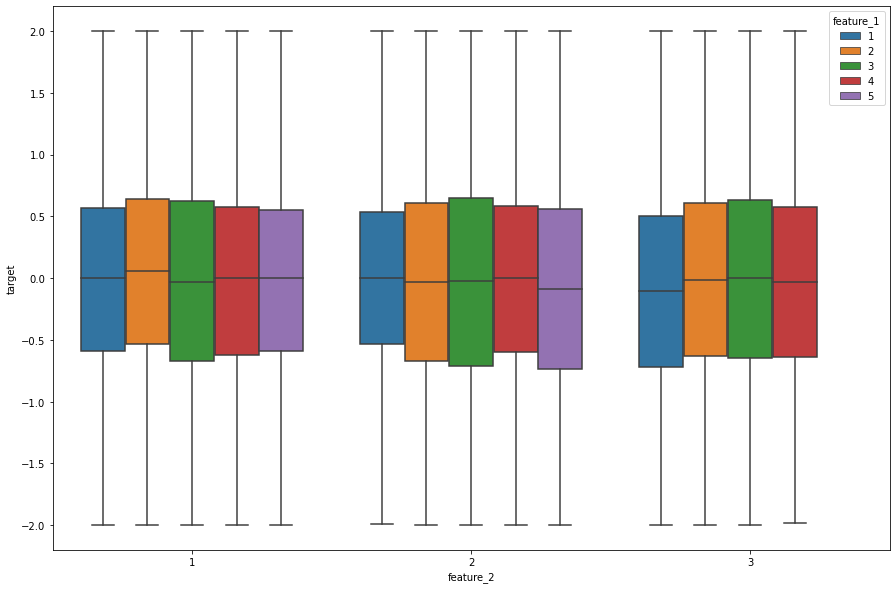

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='feature_2',y='target',hue = 'feature_1',data=nout_train_df,ax = ax)

## Analysis
* When feature_2 has a value 3 then feature_1 doesn't contain category 5 as it's value.

## Conclusion
* We can build a binary feature using the above information where we keep value = 1 when feature_2 has a category value of '3' and 0 otherwise.

## 4.3 Objective : To check for feature interaction between feature_2 and feature_3

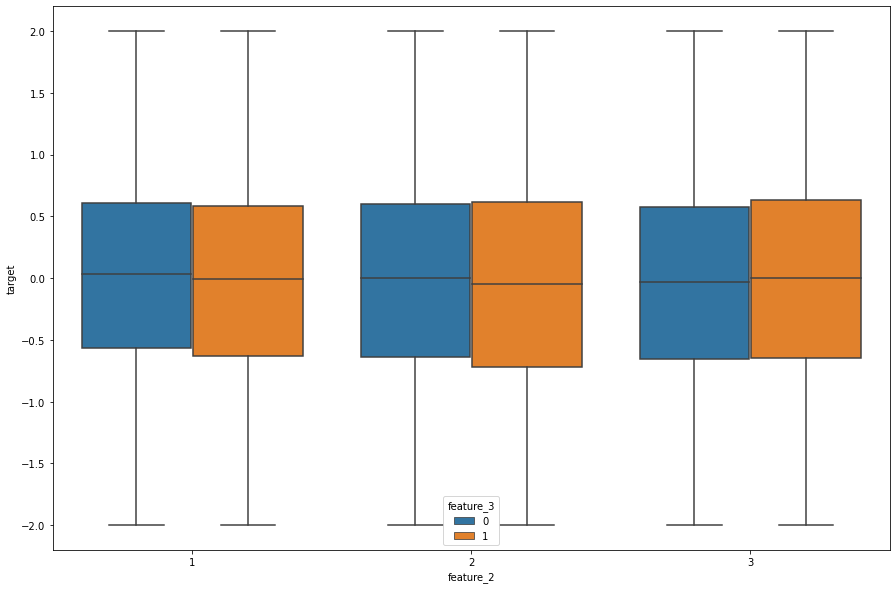

In [31]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='feature_2',y='target',hue = 'feature_3',data=nout_train_df,ax = ax)

## Analysis
* No major difference in distribution of target variable.

## Conclusion
* Not possible to form any new feature.

## 4.4 Objective : To check for feature interaction between feature_1 and feature_3

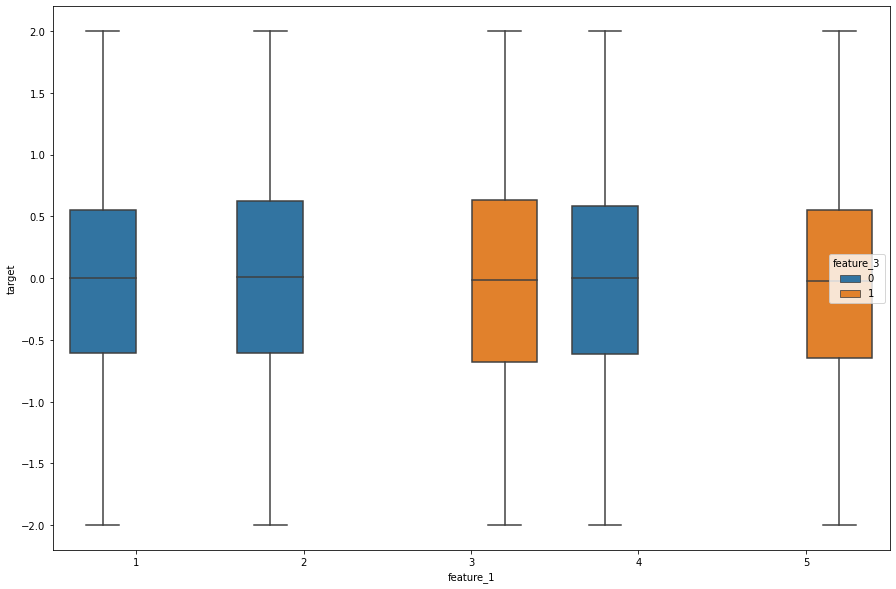

In [33]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='feature_1',y='target',hue = 'feature_3',data=nout_train_df,ax = ax)

## Analysis
* When feature_1 contains category 3 and 5 then feature_3 has all the 1's.

## Conclusion
* We can create a binary feature such that value = 1 when feature_1 has a category value greater than 3 and 0 otherwise.

## Objective : To check relation of target variable and day,wday,month and year attributes of first active month

In [4]:
train_df['first_active_month'] = pd.to_datetime(train_df['first_active_month'])
print("Type of data in first active month : ",type(train_df['first_active_month'][0]))

Type of data in first active month :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
train_df['day'] = train_df['first_active_month'].dt.day
train_df['wday'] = train_df['first_active_month'].dt.weekday
train_df['year'] = train_df['first_active_month'].dt.year
train_df['month'] = train_df['first_active_month'].dt.month

In [7]:
nout_train_df = train_df[(train_df['target'] <= 2) & (train_df['target'] >= -2)]

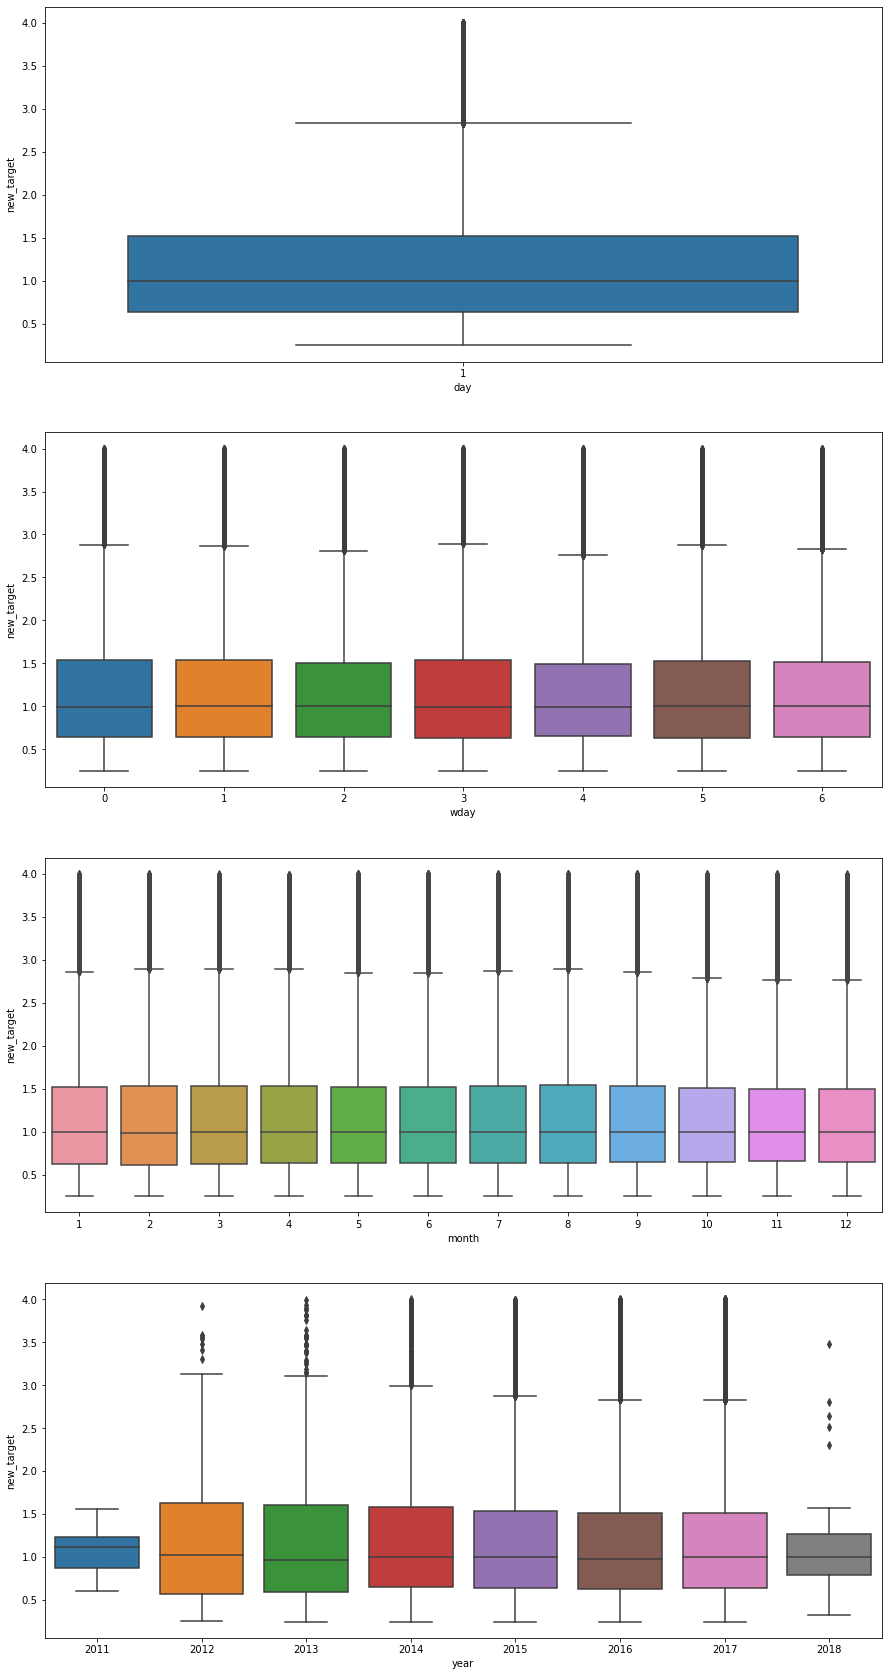

In [11]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows = 4,ncols = 1,figsize=(15,30))

sns.boxplot(x='day',y='target',data=nout_train_df,ax = ax1)
sns.boxplot(x='wday',y='target',data=nout_train_df,ax = ax2)
sns.boxplot(x='month',y='target',data=nout_train_df,ax = ax3)
sns.boxplot(x='year',y='target',data=nout_train_df,ax = ax4)

## Analysis
* First active month has all the days as 1 i.e all purchases are done on first day of the month or maybe they are marked so.
* While weekday and month attribute don't show any significant distribution with target variable.
* Attribute year shows some variation with target distribution for the first and last years.

## Conclusion
* Attribute year from first_active month can prove to be a useful feature.